In [32]:
import sqlite3
import pandas as pd
import sqlalchemy
import numpy as np

# MÉTODOS DE MUESTREO


Vamos a realizar un muestreo sobre datos de fútbol. He intentado conseguir una base de datos real de algún equipo que trabaje

con Big Data, como el Manchester City, pero la mayoría de información en internet es de pago, así que he usado la base

de datos más grande que he encontrado, que aunque es interesante, es la base de datos de un  videojuego muy conocido, 

pero servirá para ilustrar un muestreo. 

In [145]:
con= sqlite3.connect("database.sqlite")# importamos la base de datos. 


df = pd.read_sql_query( "SELECT * from Player_Attributes", con)
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [146]:
df.columns# miramos las columnas

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [147]:
df.shape# así como las dimensiones 

(183978, 42)

In [42]:
# Para ilustrar dos técnicas de muestreo aleatorias, sistemática y simple, vamos a quedarnos con tan sólo tres variables, 
# una categórica, y dos numéricas: 
# preferred_foot, agility, crossing.

dff= df [["preferred_foot", "agility", "crossing"]]



 Nuestro punto de partida será un __*muestreo piloto*__ lo suficientemente amplío para calcular la desviación estandar de cada 
variable numéricas, así como los porcentajes de la categórica. Supondremos que la única información de la que dispondremos será la población total, N = len (dff), por lo que **vamos a ignorar toda la información del data set que no obtengamos de las muestras, salvo N**
 
 Una vez, estimdas las dos desviaciones, y los porcentajes de la variable categórica, las usaremos como información pasada, para estimar el tamaño de la muestra, **n**. Por cada variable habrá un número de muestra mínimo dentro de un coeficiente de confianza, inventado, y un error relativo máximo. Para ello sacaremos el cáclulo del Estimador insesgado de la Media de la muestra, y de la proporción de clase. 
 
 Teorías explicadas y demostradas en los siguientes enlaces. 
 http://matematicas.unex.es/~inmatorres/teaching/muestreo/assets/Cap1.pdf
 http://matematicas.unex.es/~inmatorres/teaching/muestreo/assets/Cap_3.pdf
 http://matematicas.unex.es/~inmatorres/teaching/muestreo/assets/cap_5.pdf
 
 Llegando a dos fórmulas. 
 


* \begin{aligned}\cdot \\ n=\dfrac{NZ^{2}\sigma ^{2}}{\left( N-1\right)  E^{2}+z^{2}\sigma ^{2}}\end{aligned}


* \begin{aligned}\cdot \\  n=\dfrac{Z^{2}Npq}{\left( N-1\right) e^{2}+Z^{2}pq}\end{aligned}

In [45]:
# Primero de todo escogemos una muestra aleatoria simple, que nos servirá para obtener ciertos parámetros para luego usar como
# referencia bibliográfica

piloto = dff.sample(n = 300)

piloto.head()


,preferred_foot,agility,crossing
58809,left,51.0,25.0
145672,left,79.0,80.0
40686,left,72.0,71.0
98544,right,65.0,46.0
179885,right,62.0,47.0


In [148]:
D1 = 13.93 # desviación para la variable agility
D2 = 16.95 # desviación para crossing. 
piloto.describe() # sacamos información estadística sobre la prueba piloto. Y de ahí sacamos la desviación de ambas 
# variables cuantificables. 



,agility,crossing
count,295.000000,297.000000
mean,65.118644,54.855219
std,13.937036,16.946734
min,23.000000,8.000000
25%,58.000000,47.000000
50%,67.000000,58.000000
75%,74.000000,67.000000
max,94.000000,86.000000


<AxesSubplot:ylabel='Frequency'>

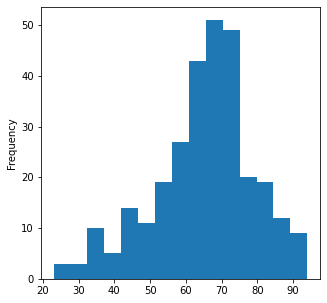

In [149]:
import matplotlib.pyplot as plt
piloto["agility"].plot (kind = "hist", bins = 15
                        , figsize= (5,5))

# Hacemos una observación gráfica de las dos variables, y podemos ver que tiene una cierta tendencia a una normal. 
# al ser la media una variable aleatoriam( ya que depende del tamaño de la muestrta y de los elementos seleccionados u(i)), 
# para n tendiendo a infinito, tiende a una normal( Teorema del límite Central)



<AxesSubplot:ylabel='Frequency'>

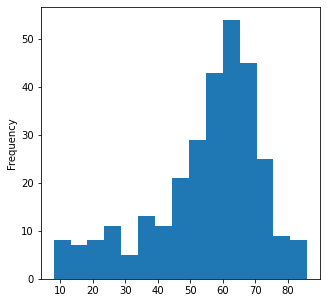

In [63]:
piloto["crossing"].plot (kind = "hist", bins = 15
                        , figsize= (5,5))

In [150]:
# por últimos nos falta anailzar los valores de la variable preferred_foot
piloto["preferred_foot"].value_counts()

right    231
left      66
Name: preferred_foot, dtype: int64

In [69]:
total= 231+66
p= 231/total
print (p)# p es la posibilidad de que sea diestro, aunque el porcentaje mundial de diestros es del 90%, es más que probable 
# que para un deporte en que la simetría respecto al terreno de juego tienen importancia relativa, haya un porcentaje de 
# zurdos mayor a lo que toca. 
q = 1-p

0.7777777777777778


In [151]:
# definimos n1,n2,n3 como los tamaños de la muestra mínimos, pata un coeficiente de confianza del 70 % con un margen de error 
# relativo del 10 %, tanto si tienen una tendencia normal o no, podemos usar el cuantil de la media Z( vía normal o desigualdad de
# Chebyshev si no cumple con una tendencia a la media). Esto nos dice que para un tamaño n de una muestra, hay un 70% de que 
# las propiedades de la población total, se encuentren representadas en la muestra 
# Z para una confianza del 70 % es de 0,53, y el error relativo E = 0.1
E= 0.1
Z= 0.53
N = len (dff)
# sumando al resto de variables para calcular el tamaño de la muestra , N, D1, D2,p, q
# repasando la fórmula de la extracción del tamaño de la muestra .

* \begin{aligned}\cdot \\ n=\dfrac{NZ^{2}\sigma ^{2}}{\left( N-1\right)  E^{2}+z^{2}\sigma ^{2}}\end{aligned}


* \begin{aligned}\cdot \\  n=\dfrac{Z^{2}Npq}{\left( N-1\right) e^{2}+Z^{2}pq}\end{aligned}

In [127]:
n1= (N* (Z**2) * (D1**2))/ ( (N-1)*(E**2) + (D1**2)* (Z**2)    )
n2= (N* (Z**2) * (D2**2))/ ( (N-1)*(E**2) + (D2**2)* (Z**2) )
n3= (N* (Z**2) * (p*q))/ ( (N-1)*(E**2) + (p*q)* (Z**2)   )

print (n1,n2,n3)


     

5293.907279816063 7731.233147866318 4.854959997913803


In [128]:
# viendo que el resultado más grande es n2, tomaremos 7723 para el tamaño de la muestra
n2= int(round(n2,0))
print (round((n2/N *100),2), "%") # el procentaje de la muestra respecto al total.

4.2 %


In [129]:
print (n2)

7731


In [108]:
# Así que el muestreo aleatoria simple es 
df1 = dff.sample(n = n2)

df1.head()

,preferred_foot,agility,crossing
123305,right,46.0,31.0
87634,right,51.0,31.0
28895,left,88.0,73.0
32509,right,58.0,48.0
156494,right,68.0,67.0


In [111]:
df1.describe()# observamos las desviaciones , y vemos que son parecidas, así como la media. 

,agility,crossing
count,7626.000000,7691.000000
mean,66.182533,55.119100
std,12.847892,17.298657
min,16.000000,3.000000
25%,59.000000,45.000000
50%,68.000000,59.000000
75%,75.000000,68.000000
max,95.000000,93.000000


In [112]:
df1["preferred_foot"].value_counts()# para mirar el porcentajes de diestros o zurdos, 


right    5835
left     1856
Name: preferred_foot, dtype: int64

In [116]:
suma= 5835+1856
p2= 5835/suma
print (p2, " <  0,7777  obtenido en el piloto")

0.7586789754258224  <  0,7777  obtenido en el piloto


<AxesSubplot:ylabel='Frequency'>

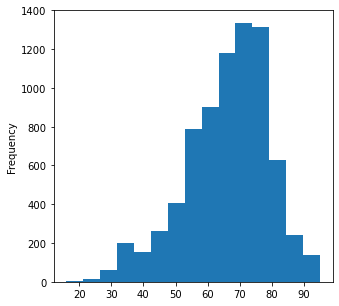

In [118]:
# si miramos los gráficos , podremos ver cierto parecido con el piloto
df1["agility"].plot (kind = "hist", bins = 15
                        , figsize= (5,5))

<AxesSubplot:ylabel='Frequency'>

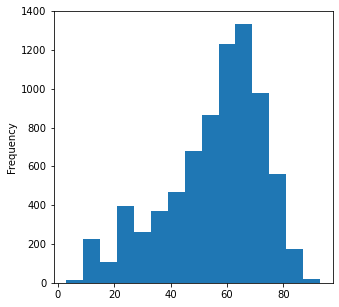

In [121]:
df1["crossing"].plot (kind = "hist", bins = 15
                        , figsize= (5,5))

In [135]:
# para hacer el nuestreo sistemático, partiremos de un valor u(i), y  a partir de ahí, iremos añadiendo un elemento 
# a la muestra cada k índices, dónde k = N/ n2, 
k =round( N/ n2,3)
# el primer número elegido u0, lo seleccionamos tal que u0 <= k
print (k)

23.797


In [136]:
import math
k= math.ceil(k)
# escogemos un número al azar entre los primeros k 
u0 = np.random.randint(1, k)
# y seleccionamos del data set , aquellos u(0 +k), u(0+2k), u(0+3k),.... u0+ (n2-1)k
df2 = dff [u0 : N : k]
df2


,preferred_foot,agility,crossing
23,left,81.0,77.0
47,right,81.0,73.0
71,right,63.0,56.0
95,right,49.0,45.0
119,left,78.0,77.0
...,...,...,...
183863,right,61.0,28.0
183887,left,85.0,67.0
183911,left,43.0,39.0
183935,right,69.0,42.0


In [139]:
# rempetimos mismas observaciones que con el muestreo aleatorio simple 
df2.describe()# observamos parecido en las desviaciones y la media

,agility,crossing
count,7544.000000,7627.000000
mean,66.050239,55.142651
std,12.998088,17.146829
min,11.000000,5.000000
25%,58.000000,45.000000
50%,68.000000,59.000000
75%,75.000000,68.000000
max,96.000000,93.000000


In [140]:
df2["preferred_foot"].value_counts()# para mirar el porcentajes de diestros o zurdos, 
# 

right    5760
left     1867
Name: preferred_foot, dtype: int64

In [152]:
y = 5760+1867
print ( 5760/y, " : porcentaje de diestro")# y observamos una tendencia parecida al muestreo aleatorio simple. 

0.7552117477382981  : porcentaje de diestro


<AxesSubplot:ylabel='Frequency'>

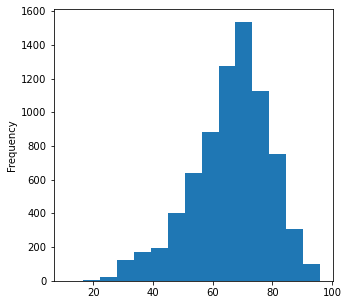

In [143]:
df2["agility"].plot (kind = "hist", bins = 15
                        , figsize= (5,5))

<AxesSubplot:ylabel='Frequency'>

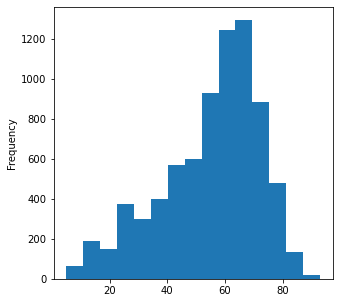

In [144]:
df2["crossing"].plot (kind = "hist", bins = 15
                        , figsize= (5,5)) # dónde en ambas gráficas podemos observar la misma tendencia que el muestreo simple
# y la prueba piloto. 
